# The Normal Distribution and Confidence Intervals

We would like to setup an experiment where we generate different columns of random numbers to simulate fair dice rolls, as well as other columns representing other quantities, to get a better understanding of the normal distribution and confidence intervals.

In [1]:
#@title Imports
#@markdown Let's import our libraries we will use for this notebook. You may recognize these libraries from the previous notebook!
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_colwidth', None)
import math

from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from statsmodels.graphics.mosaicplot import mosaic #new import
import statsmodels.api as sm

import ipywidgets as widgets
from IPython.display import display, HTML

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Generating Dice

We would like to simulate the experiment of rolling a fair six-sided die 100 times. This can be done by randomly generating 100 integers between 1 and 6 inclusive.

In [2]:
data = pd.DataFrame()

data['Die 1'] = np.random.randint(1, 7, 100)
data

,Die 1
0,3
1,3
2,3
3,4
4,6
...,...
95,6
96,3
97,3
98,1


As you can see above, we create an empty `DataFrame` and create a column `'Dice 1'`. We then use NumPy to randomly generate 100 integers between 1 (inclusive) and 7 (exclusive; the greatest possible number is 6). Rest assured, even though only ~10 rows are visible for readability purposes, all 100 rolls were indeed generated.

We will repeat this process for the three other dies we need.

In [3]:
data['Die 2'] = np.random.randint(1, 7, 100)
data['Die 3'] = np.random.randint(1, 7, 100)
data['Die 4'] = np.random.randint(1, 7, 100)
data

,Die 1,Die 2,Die 3,Die 4
0,3,2,3,2
1,3,3,6,6
2,3,6,6,3
3,4,4,3,1
4,6,6,4,6
...,...,...,...,...
95,6,6,5,5
96,3,4,5,5
97,3,2,2,3
98,1,3,6,5


Now that we have our 4 simulated dice rolls, we can create new columns that represent the sums of the dice rolls. For example, we can create a column `'2 Dice'` and add two of the first four columns together.

In [4]:
data['2 Dice'] = data['Die 1'] + data['Die 2']
data[['Die 1', 'Die 2', '2 Dice']]

,Die 1,Die 2,2 Dice
0,3,2,5
1,3,3,6
2,3,6,9
3,4,4,8
4,6,6,12
...,...,...,...
95,6,6,12
96,3,4,7
97,3,2,5
98,1,3,4


As you can see, for each row in the resultant `'2 Dice'` column, the value is indeed obtained by adding the row values from `'Die 1'` and `'Die 2'`.

We can repeat this process to create columns for `'3 Dice'` (sum of three dice rolls) and `'4 Dice'` (sum of all four dice rolls).

In [5]:
data['3 Dice'] = data['Die 1'] + data['Die 2'] + data['Die 3']
data['4 Dice'] = data['Die 1'] + data['Die 2'] + data['Die 3'] + data['Die 4']
data

,Die 1,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice
0,3,2,3,2,5,8,10
1,3,3,6,6,6,12,18
2,3,6,6,3,9,15,18
3,4,4,3,1,8,11,12
4,6,6,4,6,12,16,22
...,...,...,...,...,...,...,...
95,6,6,5,5,12,17,22
96,3,4,5,5,7,12,17
97,3,2,2,3,5,7,10
98,1,3,6,5,4,10,15


Finally, we will create a few "funny" dice. That is to say, we will simulate rolling dice that have face values different from the traditional 1-6.

Simply, we can perform the same steps when generating our first four dice, but change the boundaries when we randomly generate our 100 rolls.

In [6]:
data['Funny 1'] = np.random.randint(2, 8, 100)
data['Funny 2'] = np.random.randint(3, 9, 100)
data['Funny 3'] = np.random.randint(4, 10, 100)
data['Funny 4'] = np.random.randint(5, 11, 100)
data

,Die 1,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
0,3,2,3,2,5,8,10,7,5,5,10
1,3,3,6,6,6,12,18,2,4,9,7
2,3,6,6,3,9,15,18,6,5,4,9
3,4,4,3,1,8,11,12,3,5,5,5
4,6,6,4,6,12,16,22,2,3,7,9
...,...,...,...,...,...,...,...,...,...,...,...
95,6,6,5,5,12,17,22,4,5,6,9
96,3,4,5,5,7,12,17,7,4,4,6
97,3,2,2,3,5,7,10,3,7,8,5
98,1,3,6,5,4,10,15,4,5,4,9


## Plotting and Statistics

Now, for each column in our `DataFrame`, we can plot a histogram with the values on the x-axis and the frequencies on the y-axis.

We will break this up into three sets of subplots for readability.

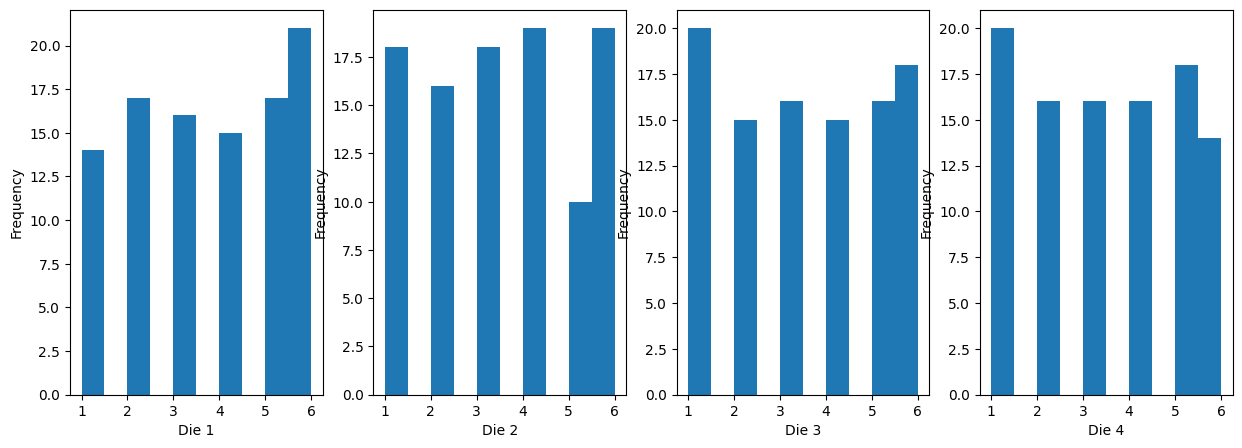

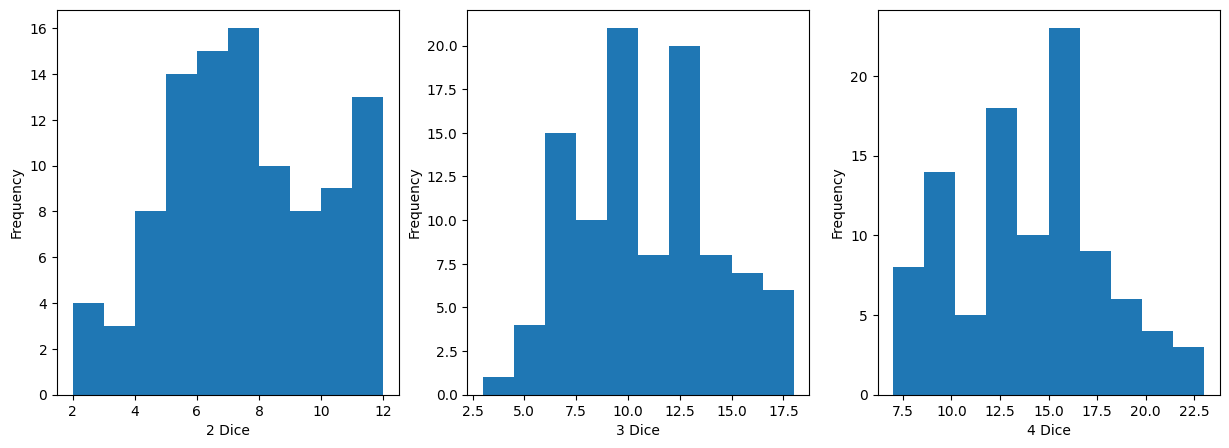

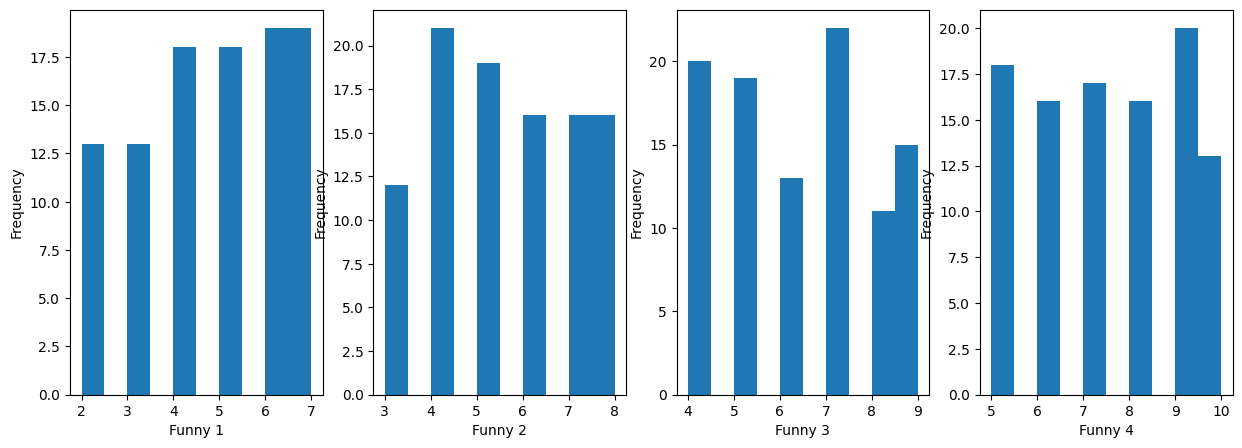

In [27]:
#@title Histograms

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(data.columns[:4]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data.columns[4:7]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(data.columns[7:]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

We can also plot boxplots for each column.

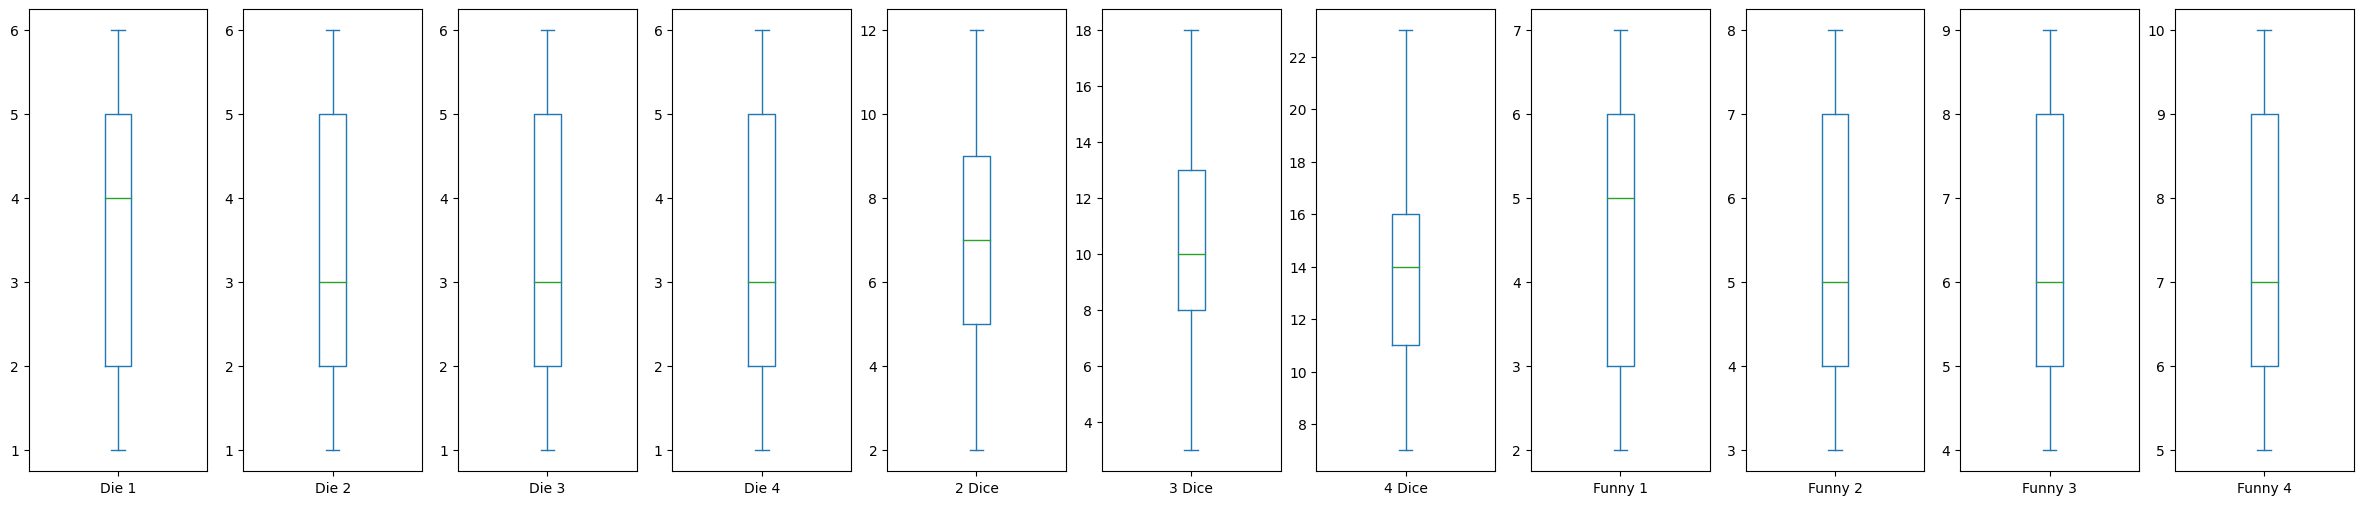

In [29]:
#@title Boxplots

fig, axs = plt.subplots(1, len(data.columns), figsize=(30, 6))
for i, col in enumerate(data.columns):
    data[col].plot.box(ax=axs[i])

plt.show()

Next, we will calculate the following statistics to get a better understanding of these distributions:
* Mean
* Median
* Standard Deviation
* Standard Error of the Mean
* 95% Confidence Interval

In [26]:
#@title Statistics

crit_t = stats.t.ppf(1-0.025,df=(len(data)-1))

stat_df = pd.DataFrame()
stat_df['Mean'] = data.mean()
stat_df['Median'] = data.median()
stat_df['Std. Dev.'] = data.std()
stat_df['Std. Err.'] = data.sem()
stat_df['Lower 95%'] = data.mean() - crit_t * data.sem()
stat_df['Upper 95%'] = data.mean() + crit_t * data.sem()
stat_df = stat_df.T
stat_df

,Die 1,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.670000,3.440000,3.460000,3.380000,7.110000,10.570000,13.950000,4.740000,5.510000,6.300000,7.430000
Median,4.000000,3.000000,3.000000,3.000000,7.000000,10.000000,14.000000,5.000000,5.000000,6.000000,7.000000
Std. Dev.,1.741096,1.736826,1.783312,1.727847,2.593290,3.328041,3.712863,1.667394,1.642215,1.714466,1.689271
Std. Err.,0.174110,0.173683,0.178331,0.172785,0.259329,0.332804,0.371286,0.166739,0.164221,0.171447,0.168927
Lower 95%,3.324529,3.095376,3.106152,3.037158,6.595435,9.909644,13.213287,4.409153,5.184149,5.959813,7.094812
Upper 95%,4.015471,3.784624,3.813848,3.722842,7.624565,11.230356,14.686713,5.070847,5.835851,6.640187,7.765188


## Distributions by Die 1

Now, we will want to select random samples from each of the columns we have created in our DataFrame. How can we do this?

Since our first column consists of randomly generated numbers, if we select all the corresponding rows of, say, `'Die 2'` where the value of `'Die 1'` equals 1, it is equivalent to drawing a random sample of `'Die 2'`.

In [32]:
samples = []
for face in data['Die 1'].unique():
  samples.append(data[data['Die 1'] == face].drop('Die 1', axis=1))

    Die 2  Die 3  Die 4  2 Dice  3 Dice  4 Dice  Funny 1  Funny 2  Funny 3  \
0       2      3      2       5       8      10        7        5        5   
1       3      6      6       6      12      18        2        4        9   
2       6      6      3       9      15      18        6        5        4   
7       2      6      1       5      11      12        5        3        9   
13      4      5      5       7      12      17        2        5        7   
25      5      2      5       8      10      15        6        5        9   
27      5      6      1       8      14      15        5        5        9   
30      1      1      5       4       5      10        2        7        7   
31      5      1      1       8       9      10        6        4        6   
43      3      2      1       6       8       9        7        3        6   
46      3      5      3       6      11      14        7        6        5   
56      2      4      2       5       9      11        2        

Let's go ahead and calculate the same statistics for each sample.

In [38]:
#@title Statistics for Samples

for i,sample in enumerate(samples):
  crit_t = stats.t.ppf(1-0.025,df=(len(sample)-1))
  sample_df = pd.DataFrame()
  sample_df['Mean'] = sample.mean()
  sample_df['Median'] = sample.median()
  sample_df['Std. Dev.'] = sample.std()
  sample_df['Std. Err.'] = sample.sem()
  sample_df['Lower 95%'] = sample.mean() - crit_t * sample.sem()
  sample_df['Upper 95%'] = sample.mean() + crit_t * sample.sem()
  sample_df = sample_df.T
  display(HTML(f"<h3>Sample {i+1} (Die 1 = {i+1})</h3>"))
  display(sample_df)

,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.500000,3.500000,3.062500,6.500000,10.000000,13.062500,4.750000,5.312500,6.500000,7.187500
Median,3.000000,3.500000,3.000000,6.000000,10.000000,13.000000,5.500000,5.000000,6.500000,7.000000
Std. Dev.,1.549193,2.065591,1.842779,1.549193,2.683282,3.434506,2.175623,1.537043,1.897367,1.869715
Std. Err.,0.387298,0.516398,0.460695,0.387298,0.670820,0.858627,0.543906,0.384261,0.474342,0.467429
Lower 95%,2.674493,2.399324,2.080553,5.674493,8.570180,11.232381,3.590693,4.493468,5.488965,6.191199
Upper 95%,4.325507,4.600676,4.044447,7.325507,11.429820,14.892619,5.909307,6.131532,7.511035,8.183801


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.266667,3.000000,3.133333,7.266667,10.266667,13.400000,4.800000,5.666667,6.066667,7.133333
Median,3.000000,3.000000,3.000000,7.000000,10.000000,13.000000,5.000000,6.000000,6.000000,7.000000
Std. Dev.,1.751190,1.812654,1.767430,1.751190,2.548576,3.202677,1.567528,1.234427,1.624221,1.684665
Std. Err.,0.452155,0.468025,0.456349,0.452155,0.658039,0.826928,0.404734,0.318728,0.419372,0.434979
Lower 95%,2.296890,1.996186,2.154563,6.296890,8.855312,11.626416,3.931932,4.983064,5.167203,6.200397
Upper 95%,4.236443,4.003814,4.112104,8.236443,11.678021,15.173584,5.668068,6.350269,6.966131,8.066270


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.380952,4.285714,3.190476,9.380952,13.666667,16.857143,4.761905,5.666667,6.571429,7.571429
Median,3.000000,4.000000,3.000000,9.000000,13.000000,16.000000,5.000000,5.000000,7.000000,8.000000
Std. Dev.,1.909874,1.419255,1.721019,1.909874,2.081666,3.166792,1.513432,1.983263,1.912366,1.660465
Std. Err.,0.416769,0.309707,0.375557,0.416769,0.454257,0.691051,0.330258,0.432784,0.417312,0.362343
Lower 95%,2.511588,3.639677,2.407078,8.511588,12.719104,15.415636,4.072999,4.763896,5.700930,6.815594
Upper 95%,4.250317,4.931752,3.973874,10.250317,14.614230,18.298649,5.450811,6.569437,7.441927,8.327263


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.176471,2.647059,3.705882,5.176471,7.823529,11.529412,4.470588,6.176471,6.235294,6.647059
Median,3.000000,2.000000,4.000000,5.000000,8.000000,11.000000,5.000000,7.000000,6.000000,7.000000
Std. Dev.,1.424574,1.455214,1.447615,1.424574,2.186187,2.502939,1.841115,1.667157,1.714986,1.169464
Std. Err.,0.345510,0.352941,0.351098,0.345510,0.530228,0.607052,0.446536,0.404345,0.415945,0.283637
Lower 95%,2.444022,1.898857,2.961588,4.444022,6.699496,10.242519,3.523974,5.319298,5.353530,6.045776
Upper 95%,3.908919,3.395261,4.450177,5.908919,8.947563,12.816304,5.417202,7.033644,7.117058,7.248342


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,4.176471,3.235294,3.823529,9.176471,12.411765,16.235294,4.705882,4.941176,6.000000,7.764706
Median,5.000000,3.000000,5.000000,10.000000,12.000000,16.000000,4.000000,5.000000,6.000000,8.000000
Std. Dev.,2.007339,1.855041,2.007339,2.007339,3.103603,2.840101,1.263166,1.599632,1.695582,1.714986
Std. Err.,0.486851,0.449913,0.486851,0.486851,0.752734,0.688826,0.306363,0.387968,0.411239,0.415945
Lower 95%,3.144392,2.281520,2.791451,8.144392,10.816039,14.775049,4.056422,4.118721,5.128212,6.882942
Upper 95%,5.208549,4.189068,4.855608,10.208549,14.007490,17.695540,5.355342,5.763632,6.871788,8.646470


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.071429,3.928571,3.357143,4.071429,8.000000,11.357143,5.000000,5.214286,6.357143,8.357143
Median,3.000000,4.000000,3.500000,4.000000,8.000000,12.000000,5.000000,5.000000,6.500000,9.000000
Std. Dev.,1.685426,1.817195,1.645841,1.685426,2.689009,3.248837,1.797434,1.528125,1.499084,1.736803
Std. Err.,0.450449,0.485666,0.439869,0.450449,0.718668,0.868288,0.480384,0.408408,0.400647,0.464180
Lower 95%,2.098293,2.879354,2.406863,3.098293,6.447412,9.481320,3.962192,4.331973,5.491598,7.354343
Upper 95%,4.044564,4.977789,4.307423,5.044564,9.552588,13.232966,6.037808,6.096599,7.222688,9.359943


And now let's plot the histogarms.

In [ ]:
# Figure this out: we need all plots for each sample...

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(data.columns[:4]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data.columns[4:7]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(data.columns[7:]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()